In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Gas.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,x
0,1709
1,1646
2,1794
3,1878
4,2173


In [4]:
df.shape

(476, 1)

In [5]:
476/12

39.666666666666664

In [6]:
date = pd.date_range(start='1/1/1983', end='1/1/2023', freq='M')
date

DatetimeIndex(['1983-01-31', '1983-02-28', '1983-03-31', '1983-04-30',
               '1983-05-31', '1983-06-30', '1983-07-31', '1983-08-31',
               '1983-09-30', '1983-10-31',
               ...
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', length=480, freq='M')

In [7]:
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,x,Time_Stamp
0,1709,1983-01-31
1,1646,1983-02-28
2,1794,1983-03-31
3,1878,1983-04-30
4,2173,1983-05-31


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   x           476 non-null    int64         
 1   Time_Stamp  476 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.6 KB


In [11]:
df.isnull().sum()

x    0
dtype: int64

In [9]:
df.tail()

,x,Time_Stamp
471,49013,2022-04-30
472,56624,2022-05-31
473,61739,2022-06-30
474,66600,2022-07-31
475,60054,2022-08-31


In [10]:
# convert datetime into index form
df.set_index(keys='Time_Stamp', drop=True, inplace=True)
df.head()

,x
Time_Stamp,
1983-01-31,1709
1983-02-28,1646
1983-03-31,1794
1983-04-30,1878
1983-05-31,2173


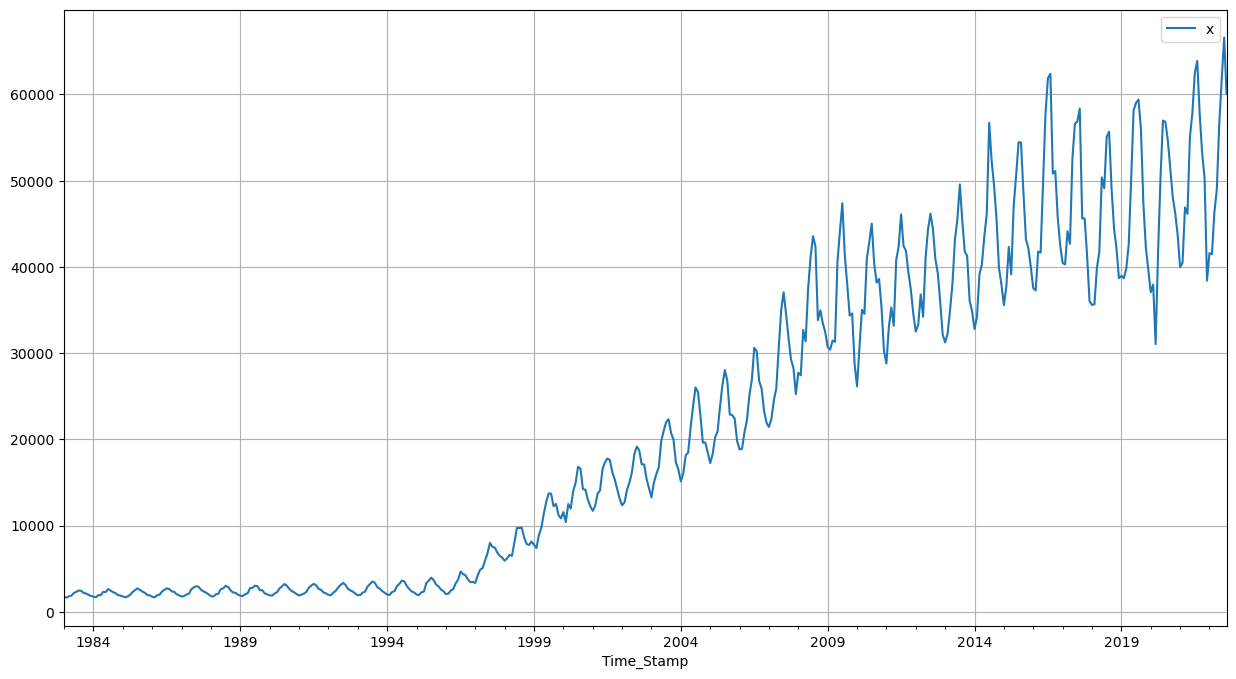

In [12]:
df.plot(figsize=(15,8), grid=True)
plt.show()

# check component - Decomposition

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14,7
decomposition_additive = seasonal_decompose(df, model='additive')
decomposition_multiplicative = seasonal_decompose(df, model='multiplicative')

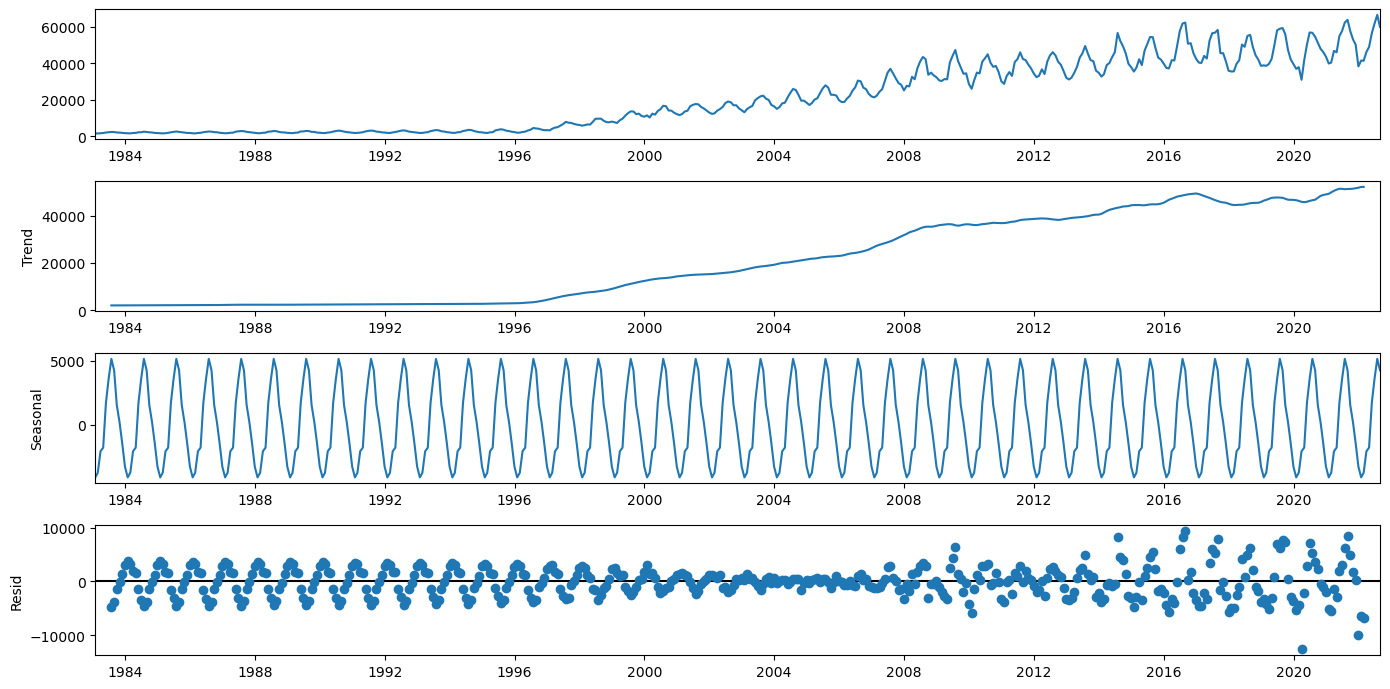

In [16]:
decomposition_additive.plot()
plt.show()

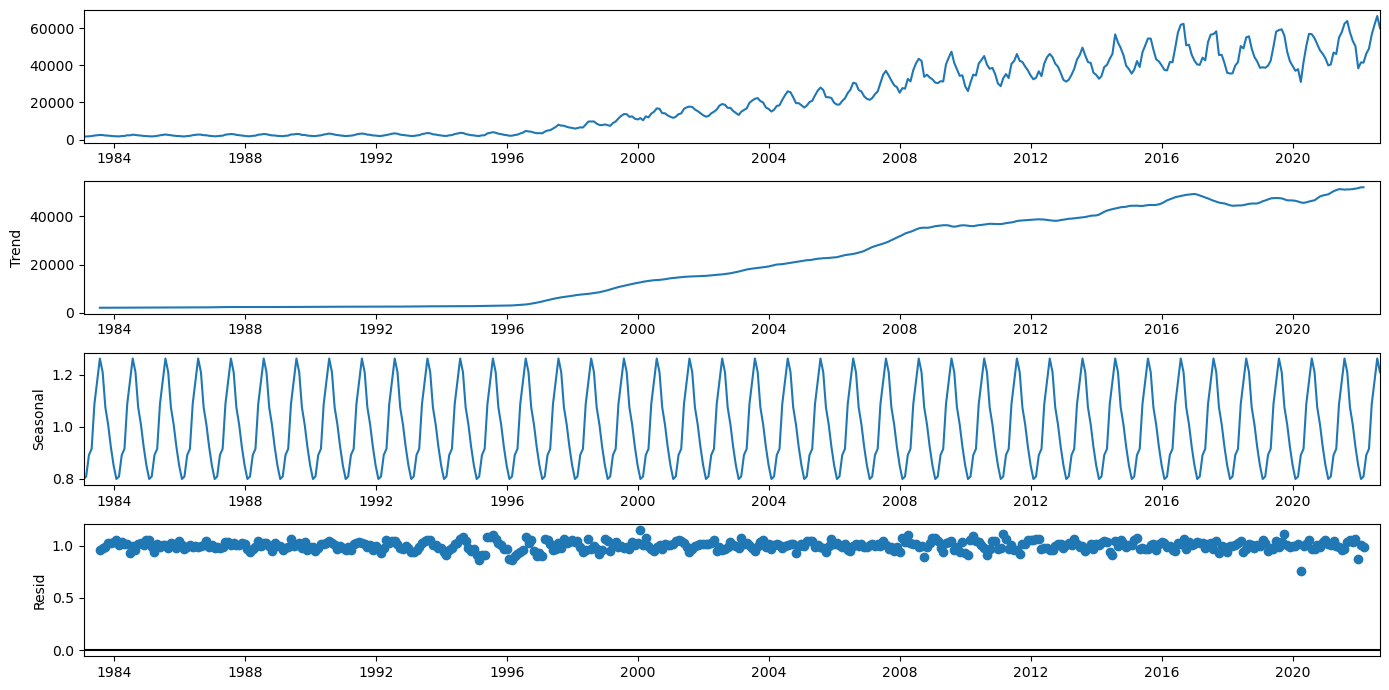

In [17]:
decomposition_multiplicative.plot()
plt.show()

# Check Autocorrelation - Durbin Watson Test

In [18]:
import statsmodels.api as sm

In [19]:
sm.stats.durbin_watson(df)

array([0.00981745])